# Dataset Link: https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format

Sentiment Analysis can help us finding out the mood and emotions of general a customer or reviewer and it helps in gathering the insightful information regarding the context. Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.

In [1]:
#Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])

2022-09-04 20:16:12.450683: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-04 20:16:12.463665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-04 20:16:12.463681: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-04 20:16:14.168909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-04 20:16:14.168936: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to c

# Load the data

In [2]:
#Load the data and visualize the top five rows using the panadas
data=pd.read_csv('/home/vinod/Downloads/Test.csv')
data.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [3]:
#Print the shape of the data
data.shape

(5000, 2)

In [4]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [5]:
#read the train data using the pandas
train=pd.read_csv('/home/vinod/Downloads/Train.csv')
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
#print the shape of the data
train.shape

(40000, 2)

In [7]:
#train data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [8]:
#to visuaize the label percentage in the train dataset
pie=train['label'].value_counts()
pie

0    20019
1    19981
Name: label, dtype: int64

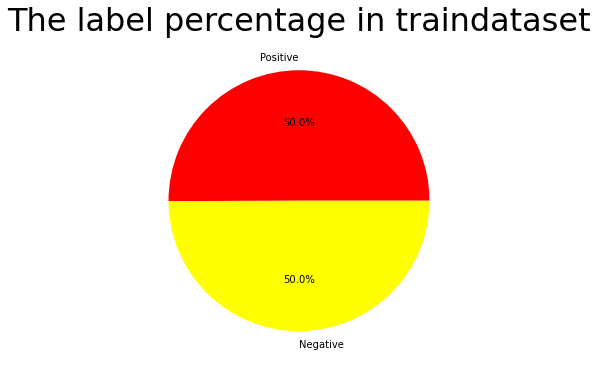

In [9]:
#to visualize the above information in the pie chart
plt.figure(figsize=(18,6))
plt.pie(pie,labels=['Positive','Negative'],colors=['red','yellow'],autopct='%1.1f%%')
#set the title name with fontsize 
plt.title("The label percentage in traindataset",fontsize=32)
plt.show()

In [10]:
#Let's check the sentiment using textblod
TextBlob("he is very good boy").sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [11]:
#let's check another sentiment using textblod
TextBlob("Even though I have great interest in Biblical").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

## Polarity and Subjectivity
Polarity is a float value which helps in identifying whether a sentence is positive or negative. Its values ranges in [-1,1] where 1 means positive statement and -1 means a negative statement. 

On the other side, Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]. Closer the value to 1, more likly it is public opinion.

In [12]:
#Take only 5000 samples data and add the data
label_0=train[train['label']==0].sample(n=5000)
label_1=train[train['label']==1].sample(n=5000)
train=pd.concat([label_1,label_0])

In [13]:
from sklearn.utils import shuffle
train=shuffle(train)
train.head()

,text,label
21748,"Oh, it's the movie - I thought I waited too lo...",0
27448,"Why would a person go back to a person, who ki...",0
18039,"For sheer quality of performance and the ""thea...",1
33964,I have no idea what idiots gave this movie a P...,0
2758,I was laughing so hard most of the time I had ...,1


# Data Preprocessing 

In [14]:
#Check the null value in the train datset
train.isna().sum()

text     0
label    0
dtype: int64

In [15]:
#replace the null values with np.nan
train.replace(r'^\s*$',np.nan,regex=True,inplace=True)
train.dropna(axis=0,how='any',inplace=True)

In [16]:
train.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
print('escape seq removed')

escape seq removed


In [17]:
train.head()

,text,label
21748,"Oh, it's the movie - I thought I waited too lo...",0
27448,"Why would a person go back to a person, who ki...",0
18039,"For sheer quality of performance and the ""thea...",1
33964,I have no idea what idiots gave this movie a P...,0
2758,I was laughing so hard most of the time I had ...,1


In [18]:
train['text']=train['text'].str.encode('ascii','ignore').str.decode('ascii')
print('non ascii is remove')

non ascii is remove


In [19]:
#let's import string and remove punctuation from the dataset
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#Creat the function and remove the punctuation
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
#And apply function to the train dataset
train['text']=train['text'].apply(remove_punctuation)

In [21]:
train.head()

,text,label
21748,Oh its the movie I thought I waited too long ...,0
27448,Why would a person go back to a person who kic...,0
18039,For sheer quality of performance and the theat...,1
33964,I have no idea what idiots gave this movie a P...,0
2758,I was laughing so hard most of the time I had ...,1


In [22]:
#import nltk and import the stopwords
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
#create the remove the stopwords
stop_words_list=nltk.corpus.stopwords.words('english')
stop_words_list.remove('no')
stop_words_list.remove('not')

In [24]:
#install the tokeninzer
tokenizer = ToktokTokenizer()
#Create function to remove the stopwords
def remove_stopwords(text,is_lower_case=True):
    tokens=tokenizer.tokenize(text)
    tokens=[token.strip() for token in tokens]
    if is_lower_case:
        filterd_tokens=[token for token in tokens if token not in stop_words_list]
    else:
        filterd_tokens=[token for token in tokens if token.lower() not in stop_words_list]
    filterd_text=' '.join(filterd_tokens)
    return filterd_text

In [25]:
train['text']=train['text'].apply(remove_stopwords)

In [26]:
#remove the special characters
def remove_special_characters(text):
    text=re.sub('[^a-zA-z0-9\s]','',text)
    return text

In [27]:
#apply the above function to the traindataset
train['text']=train['text'].apply(remove_special_characters)
train.head().style.background_gradient(cmap='jet')

,text,label
21748,Oh movie I thought I waited long take dog I cant believe I watched whole thing I guess I optimistically anticipating going get better Horribly disjointed dialog pathetic acting totally improbable events Like Tobys mom hanging time takes Col walk upstairs back room 24 ceiling no chairs counters anything around motionlessly suspended body could possibly used climb The little girl played daughter last family best actor whole movie puppy first couple close second The basic storyline potential good script director could seriously creepy flick version sadly not I get scared I open electric bill every month,0
27448,Why would person go back person kicks teeth not not twice againbr br This film teaches us order find love must accept abuse not forgive fully accept Gosh No wonder first relationship lasted ten years I obviously wasnt embracing inner masochistbr br As Bucatinskys writing debut many wonderful aspects film however order justify reunion Eli Tom character development would helpful We never acquainted Elis masochism fact led believe not masochist although Toms psychoemotional sadism highly evident,0
18039,For sheer quality performance theater absurd one hard compare anything else With world melting early 70s film made perfect sense still resonates George Scott could never typecast,1
33964,I no idea idiots gave movie Palm DOr 1999 Cannes Film Festival atrocious I actually watched entire thing simply I couldnt believe someone would make worthless film There nothing interesting plot characters devoid depth no attempt giving sort ambiance music sound effects Also decide waste 2 hours life watching film sure bring something throw cinematography simply someone running around handheld camcorder half time cant even see main subjects This style used much successfully movies Blair Witch creates suspense In Rosetta no plot no suspense style would lend anything I known better came 2 oclock morning going horrible,0
2758,I laughing hard time I people glaring couldnt hear laughter I literally fell seat specific pointbr br Im Bartender Bouncer living Real world note use term Real world sadly always come first whenever I tell someone I play RPGs usually followed one two questions 1 What like DD I played back Junior Highbr br 2 Really Ive looking group forever Have room another Very rarely people not know DD Gaming arebr br That said almost every person watches movie get something Even arent Gamer chances something life Geek Out made fun light hearted way alone means relate hijinx flick Its light hearted happiness hour half,1


In [28]:
#Remove html patternst
def remove_html(text):
    html_pattran=re.compile('<.*?>')
    return html_pattran.sub(r' ',text)
#And apply the above function to the train data
train['text']=train['text'].apply(remove_html)

In [29]:
#Read the above data to five rows
train.head()

,text,label
21748,Oh movie I thought I waited long take dog I ca...,0
27448,Why would person go back person kicks teeth no...,0
18039,For sheer quality performance theater absurd o...,1
33964,I no idea idiots gave movie Palm DOr 1999 Cann...,0
2758,I laughing hard time I people glaring couldnt ...,1


In [30]:
#Remove the html url from the train dataset
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ',text)
#And apply to the train dataset
train['text']=train['text'].apply(remove_url)

In [31]:
train.head()

,text,label
21748,Oh movie I thought I waited long take dog I ca...,0
27448,Why would person go back person kicks teeth no...,0
18039,For sheer quality performance theater absurd o...,1
33964,I no idea idiots gave movie Palm DOr 1999 Cann...,0
2758,I laughing hard time I people glaring couldnt ...,1


In [32]:
#Remove the numbers in the dataset
def remove_numbers(text):
    text=''.join([i for i in text if  not i.isdigit()])
    return text
#And apply the above function to the train data
train['text']=train['text'].apply(remove_numbers)

In [33]:
train.head()

,text,label
21748,Oh movie I thought I waited long take dog I ca...,0
27448,Why would person go back person kicks teeth no...,0
18039,For sheer quality performance theater absurd o...,1
33964,I no idea idiots gave movie Palm DOr Cannes F...,0
2758,I laughing hard time I people glaring couldnt ...,1


In [34]:
def cleanse(word):
    rx=re.compile(r'\D*\d')
    if rx.match(word):
        return ' '
    return word
#Remove the alpha numaric
def alpha_numeric(strings):
    nstrings=[" ".join(filter(None,(cleanse(word) for word in string.split()))) for string in strings.split()]
    str1=" ".join(nstrings)
    return str1
#Apply to the above function to the train dataset
train['text']=train['text'].apply(alpha_numeric)

In [35]:
train.head()

,text,label
21748,Oh movie I thought I waited long take dog I ca...,0
27448,Why would person go back person kicks teeth no...,0
18039,For sheer quality performance theater absurd o...,1
33964,I no idea idiots gave movie Palm DOr Cannes Fi...,0
2758,I laughing hard time I people glaring couldnt ...,1


In [36]:
#lemmatizer
def lemmatize(text):
    text=nlp(text)
    text=" ".join([word.lemma_ if word.lemma_!='-PRON-' else word for word in text])
    return text
#Apply the above function to the rain dataset
train['text']=train['text'].apply(lemmatize)

In [37]:
#Let's create the another column sentiment
train['sentiment']=train['text'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [38]:
train.head()

,text,label,sentiment
21748,oh movie I think I wait long take dog I can no...,0,"(-0.021875000000000012, 0.5337500000000001)"
27448,why would person go back person kick tooth not...,0,"(0.22272727272727275, 0.3106060606060606)"
18039,for sheer quality performance theater absurd o...,1,"(0.06166666666666665, 0.7183333333333333)"
33964,I no idea idiot give movie Palm DOr Cannes Fil...,0,"(-0.09509803921568627, 0.5242063492063493)"
2758,I laugh hard time I people glare could not hea...,1,"(0.10864057239057238, 0.4057870370370371)"


In [39]:
sentiment_series = train['sentiment'].tolist()

In [40]:
columns = ['polarity', 'subjectivity']
df1 = pd.DataFrame(sentiment_series, columns=columns, index=train.index)

In [41]:
df1.head().style.background_gradient(cmap='Reds')

,polarity,subjectivity
21748,-0.021875,0.533750
27448,0.222727,0.310606
18039,0.061667,0.718333
33964,-0.095098,0.524206
2758,0.108641,0.405787


In [42]:
result = pd.concat([train,df1],axis=1)

In [43]:
result.drop(['sentiment'],axis=1,inplace=True)

In [44]:
result.loc[result['polarity']>=0.3, 'Sentiment'] = "Positive"
result.loc[result['polarity']<0.3, 'Sentiment'] = "Negative"

In [45]:
result.head()

,text,label,polarity,subjectivity,Sentiment
21748,oh movie I think I wait long take dog I can no...,0,-0.021875,0.533750,Negative
27448,why would person go back person kick tooth not...,0,0.222727,0.310606,Negative
18039,for sheer quality performance theater absurd o...,1,0.061667,0.718333,Negative
33964,I no idea idiot give movie Palm DOr Cannes Fil...,0,-0.095098,0.524206,Negative
2758,I laugh hard time I people glare could not hea...,1,0.108641,0.405787,Negative


In [46]:
result.loc[result['label']==1, 'Sentiment_label'] = 1
result.loc[result['label']==0, 'Sentiment_label'] = 0

In [47]:
result

,text,label,polarity,subjectivity,Sentiment,Sentiment_label
21748,oh movie I think I wait long take dog I can no...,0,-0.021875,0.533750,Negative,0.0
27448,why would person go back person kick tooth not...,0,0.222727,0.310606,Negative,0.0
18039,for sheer quality performance theater absurd o...,1,0.061667,0.718333,Negative,1.0
33964,I no idea idiot give movie Palm DOr Cannes Fil...,0,-0.095098,0.524206,Negative,0.0
2758,I laugh hard time I people glare could not hea...,1,0.108641,0.405787,Negative,1.0
...,...,...,...,...,...,...
39596,okay I remember watch first one boy suck after...,0,0.032143,0.373810,Negative,0.0
39937,the belief Big other invisible power structure...,1,0.020496,0.446241,Negative,1.0
8532,this movie three teen good friend long time go...,1,0.109375,0.367708,Negative,1.0
34581,caught movie DD flipping channelsand thank hea...,1,0.237500,0.559375,Negative,1.0


# Finally we create the modeling

In [48]:
#Check the columns in the dataset
result.columns

Index(['text', 'label', 'polarity', 'subjectivity', 'Sentiment',
       'Sentiment_label'],
      dtype='object')

In [49]:
#Divide the dataset two varible
X=result['text'].values
y=result['label'].values

In [50]:
#Covert the text into araay using the TfidfVectorizer because the our machine can't learn categorical data
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
#install the model
vector=TfidfVectorizer(lowercase=False)
vector.fit(X)
#Transform the above fit the data using the TfidfVectorizer and finally print it
X=vector.fit_transform(X)
X

<10000x75516 sparse matrix of type '<class 'numpy.float64'>'
	with 1025485 stored elements in Compressed Sparse Row format>

In [52]:
#divided the data for train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Checking the model for Logistic Regerssion

In [53]:
# instancy the Logistiregression model
logistic=LogisticRegression()
#And fit the data to the model
logistic.fit(X_train,y_train)

LogisticRegression()

In [54]:
#Prediction to the data
logistic_pred=logistic.predict(X_test)
logistic_pred

array([1, 1, 1, ..., 1, 0, 1])

In [55]:
#Check the test score and train score to the model
print(f'The Logisticregression model test score is {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Logisticregression model train scores is {logistic.score(X_train,y_train)*100:.2f}')

The Logisticregression model test score is 85.48
The Logisticregression model train scores is 94.52


In [56]:
#import the accuracy_score and classification report to the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

The logisticRegression accuracy_score 85.48
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1283
           1       0.83      0.88      0.86      1217

    accuracy                           0.85      2500
   macro avg       0.86      0.86      0.85      2500
weighted avg       0.86      0.85      0.85      2500



<AxesSubplot:>

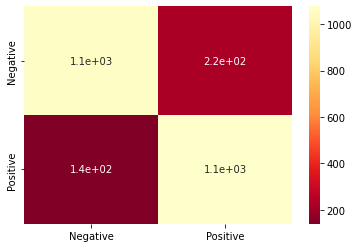

In [57]:
#Check the accuracy_score to the model
print(f'The logisticRegression accuracy_score {accuracy_score(y_test,logistic_pred)*100:.2f}')
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='YlOrRd_r',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])

# DecisionTreeClassifier

In [58]:
#install the DecisionTreeCalssifier
from sklearn.tree import DecisionTreeClassifier
#Install the model
tree=DecisionTreeClassifier()
#fit the model to the train data
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
#prediction
tree_pred=tree.predict(X_test)
tree_pred

array([1, 1, 1, ..., 1, 0, 1])

In [60]:
#Check the test score and train score to the model
print(f'The DecisiontreeClassification model test score is {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The DecisiontreeClassification model train scores is {tree.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The DecisiontreeClassification accuracy_score {accuracy_score(y_test,tree_pred)*100:.2f}')

The DecisiontreeClassification model test score is 69.24
The DecisiontreeClassification model train scores is 100.00
The DecisiontreeClassification accuracy_score 69.24


              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1283
           1       0.68      0.70      0.69      1217

    accuracy                           0.69      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.69      0.69      0.69      2500



<AxesSubplot:>

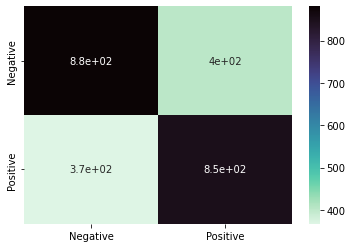

In [61]:
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='mako_r',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])

# RandomForestClassifier

In [62]:
#Import the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#install the model 
random=RandomForestClassifier()
#fit the train data to mode
random.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
#prediction
random_pred=random.predict(X_test)
random_pred

array([1, 1, 1, ..., 1, 0, 1])

In [64]:
#Check the test score and train score to the model
print(f'The RandomForestClassifier model test score is {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The RandomForestClassifier model train scores is {random.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The RandomForestClassifier accuracy_score {accuracy_score(y_test,random_pred)*100:.2f}')

The RandomForestClassifier model test score is 81.76
The RandomForestClassifier model train scores is 100.00
The RandomForestClassifier accuracy_score 81.76


              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1283
           1       0.81      0.82      0.81      1217

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



<AxesSubplot:>

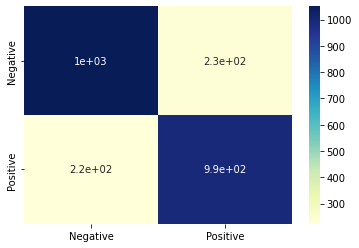

In [65]:
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])

# MultinomialNB

In [66]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)

MultinomialNB()

In [67]:
#Prediction to the test data
multinomial_pred=multinomial.predict(X_test)
multinomial_pred

array([1, 1, 1, ..., 1, 0, 1])

In [68]:
#Check the test score and train score to the model
print(f'The RandomForestClassifier model test score is {multinomial.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The RandomForestClassifier model train scores is {multinomial.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The RandomForestClassifier accuracy_score {accuracy_score(y_test,multinomial_pred)*100:.2f}')

The RandomForestClassifier model test score is 84.36
The RandomForestClassifier model train scores is 95.03
The RandomForestClassifier accuracy_score 84.36


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1283
           1       0.84      0.84      0.84      1217

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



<AxesSubplot:>

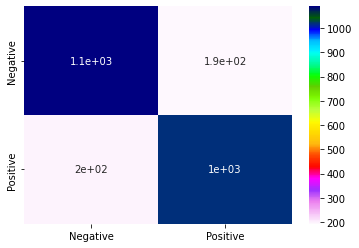

In [69]:
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap='gist_ncar_r',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])

# XGBClassifier

In [70]:
#import theXGBClssifier
from xgboost import XGBClassifier
#install the model
xgb=XGBClassifier()
#fit the data
xgb.fit(X_train,y_train)

/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [71]:
#Prediction to the test data
xgb_pred=xgb.predict(X_test)
xgb_pred

array([0, 1, 1, ..., 0, 0, 1])

In [72]:
#Check the test score and train score to the model
print(f'The XGBClassifier model test score is {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The XGBClassifier model train scores is {xgb.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The XGBClassifier accuracy_score {accuracy_score(y_test,xgb_pred)*100:.2f}')

The XGBClassifier model test score is 82.36
The XGBClassifier model train scores is 98.47
The XGBClassifier accuracy_score 82.36


              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1283
           1       0.80      0.85      0.82      1217

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



<AxesSubplot:>

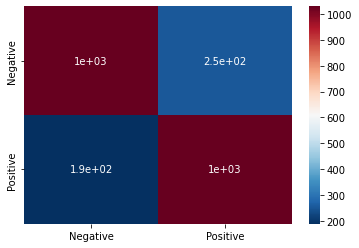

In [73]:
#Classification report
print(classification_report(y_test,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cn,annot=True,cmap='RdBu_r',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])

# Hyperparameter Tunning
A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

# RandomizedSearchCV
RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1.The first step is to write the parameters that we want to consider
2.From these parameters select the best ones.(which are printed in output)

In [74]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_search(model,X_train,Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    
 # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
    random=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
    random.fit(X_train,y_train)
  # print best parameters    
    print(random.best_params_)

# LogisticRegression

In [75]:
# create  parameters dict in list for tunning
log_para_grid = {
    'C':10.0 **np.arange(-2,3),
    'penalty':['l1','l2']
    }

# passing data for hyper parameter tunning with Gridsearchcv    
random_search(LogisticRegression(),X_train,y_train,log_para_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

{'penalty': 'l2', 'C': 10.0}


/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# instancy the Logistiregression model
logistic1=LogisticRegression(**{'penalty': 'l2', 'C': 10.0})
#And fit the data to the model
logistic1.fit(X_train,y_train)

/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0)

In [77]:
#Predicion to the data
logistic1_pred=logistic1.predict(X_test)
logistic1_pred

array([0, 1, 1, ..., 1, 0, 1])

In [78]:
#Check the test score and train score to the model
print(f'The Logistiregression model test score is {logistic1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Logistiregression model train scores is {logistic1.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Logistiregression accuracy_score {accuracy_score(y_test,logistic1_pred)*100:.2f}')

The Logistiregression model test score is 85.60
The Logistiregression model train scores is 99.80
The Logistiregression accuracy_score 85.60


# RandomForestClassifier

In [79]:
# create Classification parameters dict for tunning
rf_para_grid={'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}
# passing data for hyper parameter tunning with Randomized search cv
random_search(RandomForestClassifier(),X_train,y_train,rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [80]:
#Import the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#install the model 
random1=RandomForestClassifier(**{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True})
#fit the train data to mode
random1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250)

In [81]:
#Prediction data
random1_pred=random1.predict(X_test)
random1_pred

array([1, 1, 1, ..., 1, 0, 1])

In [82]:
#Check the test score and train score to the model
print(f'The randomforestclassifier model test score is {random1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The randomforestclassifier model train scores is {random1.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The randomforestclassifier accuracy_score {accuracy_score(y_test,random1_pred)*100:.2f}')

The randomforestclassifier model test score is 81.00
The randomforestclassifier model train scores is 89.48
The randomforestclassifier accuracy_score 81.00


# DecisionTreeClassifier

In [83]:
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_search(DecisionTreeClassifier(),X_train,y_train,DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'best', 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9}


In [84]:
#Install the model
tree1=DecisionTreeClassifier(**{'splitter': 'best', 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 5})
#fit the model to the train data
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=4)

In [85]:
#Prediction
tree1_pred=tree1.predict(X_test)
tree1_pred

array([1, 1, 1, ..., 1, 1, 1])

In [86]:
#Check the test score and train score to the model
print(f'The randomforestclassifier model test score is {tree1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The randomforestclassifier model train scores is {tree1.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The randomforestclassifier accuracy_score {accuracy_score(y_test,tree1_pred)*100:.2f}')

The randomforestclassifier model test score is 52.40
The randomforestclassifier model train scores is 54.31
The randomforestclassifier accuracy_score 52.40


# XGBClassifier

In [87]:
# create  parameters dict for tunning
XGB_para_grid = {"learning_rate"    : [0.05, 0.10] ,
 "max_depth"        : [ 3, 4, 5],
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1],
 "colsample_bytree" : [ 0.3, 0.4] }
# passing data for hyper parameter tunning with Randomized search cv
random_search(XGBClassifier(),X_train,y_train,XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with

{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.3}


In [88]:
#install the model
xgb1=XGBClassifier(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.3})
#fit the data
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [89]:
#Prediction the data
xgb1_pred=xgb1.predict(X_test)
xgb1_pred

array([1, 1, 1, ..., 0, 0, 1])

In [90]:
#Check the test score and train score to the model
print(f'The randomforestclassifier model test score is {xgb1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The randomforestclassifier model train scores is {xgb1.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The randomforestclassifier accuracy_score {accuracy_score(y_test,xgb1_pred)*100:.2f}')

The randomforestclassifier model test score is 81.12
The randomforestclassifier model train scores is 89.33
The randomforestclassifier accuracy_score 81.12
[CV] END .................................C=0.01, penalty=l2; total time=   0.5s
[CV] END .................................C=10.0, penalty=l1; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   4.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   4.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt,

# Test The model predict the good result

In [92]:
text='Oh movie I thought I waited long take dog I cant believe I watched whole thing I guess I optimistically anticipating going get better Horribly disjointed dialog pathetic acting totally improbable events Like Tobys mom hanging time takes Col walk upstairs back room 24 ceiling no chairs counters anything around motionlessly suspended body could possibly used climb The little girl played daughter last family best actor whole movie puppy first couple close second The basic storyline potential good script directo'
text=[text]
text_int=vector.transform(text)
prediction=logistic.predict(text_int)
f"Sentimet is {prediction[0]}"

'Sentimet is 0'

In [93]:
text='For sheer quality performance theater absurd one hard compare anything else With world melting early 70s film made perfect sense still resonates George Scott could ne'
text=[text]
text_int=vector.transform(text)
prediction=logistic.predict(text_int)
f"Sentimet is {prediction[0]}"

'Sentimet is 1'

# The logistic model give the best result to the model and with 85%accuray score.

# CONCLUSION

# About the data

In the data we use textblob library for positive and negative sentiment analysis performed basicEDA, text preprocessing, build different models, such as LogisticRegression,DecisiontreeClassification,RandomForestClassication,XGBboostClassifier,For the above model Only LogisticRegression have good accuracy score compare to the other model. After that We do Hyperparameter turning with parameters. 